# Accuracy Summary Table

|      Base Setup     	|     	|     	|     	|         	|            	|     	|     	|     	|         	|
|:-------------------:	|-----	|-----	|-----	|---------	|------------	|-----	|-----	|-----	|---------	|
| SciKit              	|  1  	|  2  	|  3  	| Average 	| Tensorflow 	|  1  	|  2  	|  3  	| Average 	|
| K Nearest Neighbors 	| 100 	| 100 	| 100 	|   100   	| LSTM       	| 100 	| 100 	| 100 	|   100   	|
| Linear & RBF SVM    	| 100 	| 100 	| 100 	|   100   	| GRU        	| 100 	| 100 	| 100 	|   100   	|
| QDA                 	| 100 	| 100 	| 100 	|   100   	| Simple RNN 	| 100 	| 100 	| 100 	|   100   	|
| Gaussian Process    	| 100 	| 100 	| 100 	|   100   	| Bi LSTM    	| 100 	| 100 	| 100 	|   100   	|
| Decision Tree       	| 100 	| 100 	| 100 	|   100   	| Bi GRU     	| 100 	| 100 	| 100 	|   100   	|
| Random Forest       	| 100 	| 100 	| 100 	|   100   	| Bi RNN     	| 100 	| 100 	| 100 	|   100   	|
| Neural Net          	| 100 	| 100 	| 100 	|   100   	| Dense      	| 100 	| 100 	| 100 	|   100   	|
| AdaBoost            	| 100 	| 100 	| 100 	|   100   	|            	|     	|     	|     	|         	|
| Naive Bayes         	| 100 	| 100 	| 100 	|   100   	|            	|     	|     	|     	|         	|



In [32]:
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import tensorflow as tf 

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam 

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, minmax_scale

from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import BernoulliRBM
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.datasets import load_digits

from scipy.ndimage import convolve


import collections 
import random

# Noisy Data

In [29]:
csv_filename = "MXNWSS.csv"
df = pd.read_csv(csv_filename)

window_length = 5 
t_arr = df["value"].to_numpy().reshape(-1, 1)
SS = StandardScaler()

t_arr = SS.fit_transform(t_arr).flatten()

X = []
y = []

# print("Rearranging Data")
for i in range(len(t_arr)-window_length):
    t_row = []
    for j in t_arr[i:i+window_length]:
        t_row.append([j])
    X.append(t_row)
    y.append(t_arr[i + window_length])

X = np.array(X)
y = np.array(y)

# print(X.shape, y.shape)

X_train = X[:600]
X_valid = X[:800]
X_test = X[:1000]

y_train = y[:600]
y_valid = y[:800]
y_test = y[:1000]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1)

# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_valid.shape, y_valid.shape)

# LSTM

In [32]:
model = Sequential([
    layers.InputLayer((window_length, 1)),
    layers.SimpleRNN(64, return_sequences=True),
    layers.SimpleRNN(64),
    layers.Dense(4),
    layers.Dense(1)
])

# print(model.summary())

cp = ModelCheckpoint("LSTMTestModel/", save_best_only=True)
model.compile(
    loss = MeanSquaredError(),
    optimizer = Adam(learning_rate=0.0001),
    metrics = [RootMeanSquaredError()]
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    epochs = 10,
    callbacks = [cp],
    verbose = 2
)



Epoch 1/10


INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


19/19 - 9s - loss: 1.1949 - root_mean_squared_error: 1.0931 - val_loss: 0.9176 - val_root_mean_squared_error: 0.9579 - 9s/epoch - 474ms/step
Epoch 2/10


INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


19/19 - 5s - loss: 0.7952 - root_mean_squared_error: 0.8917 - val_loss: 0.7676 - val_root_mean_squared_error: 0.8761 - 5s/epoch - 248ms/step
Epoch 3/10


INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


19/19 - 5s - loss: 0.7277 - root_mean_squared_error: 0.8531 - val_loss: 0.7270 - val_root_mean_squared_error: 0.8527 - 5s/epoch - 271ms/step
Epoch 4/10


INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


19/19 - 5s - loss: 0.6941 - root_mean_squared_error: 0.8331 - val_loss: 0.7120 - val_root_mean_squared_error: 0.8438 - 5s/epoch - 256ms/step
Epoch 5/10


INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


19/19 - 5s - loss: 0.6838 - root_mean_squared_error: 0.8269 - val_loss: 0.7078 - val_root_mean_squared_error: 0.8413 - 5s/epoch - 273ms/step
Epoch 6/10


INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


19/19 - 5s - loss: 0.6768 - root_mean_squared_error: 0.8227 - val_loss: 0.7043 - val_root_mean_squared_error: 0.8392 - 5s/epoch - 281ms/step
Epoch 7/10


INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


19/19 - 5s - loss: 0.6735 - root_mean_squared_error: 0.8207 - val_loss: 0.7006 - val_root_mean_squared_error: 0.8370 - 5s/epoch - 246ms/step
Epoch 8/10
19/19 - 0s - loss: 0.6708 - root_mean_squared_error: 0.8190 - val_loss: 0.7047 - val_root_mean_squared_error: 0.8395 - 227ms/epoch - 12ms/step
Epoch 9/10


INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


19/19 - 5s - loss: 0.6717 - root_mean_squared_error: 0.8196 - val_loss: 0.6998 - val_root_mean_squared_error: 0.8365 - 5s/epoch - 243ms/step
Epoch 10/10


INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


19/19 - 5s - loss: 0.6719 - root_mean_squared_error: 0.8197 - val_loss: 0.6979 - val_root_mean_squared_error: 0.8354 - 5s/epoch - 261ms/step


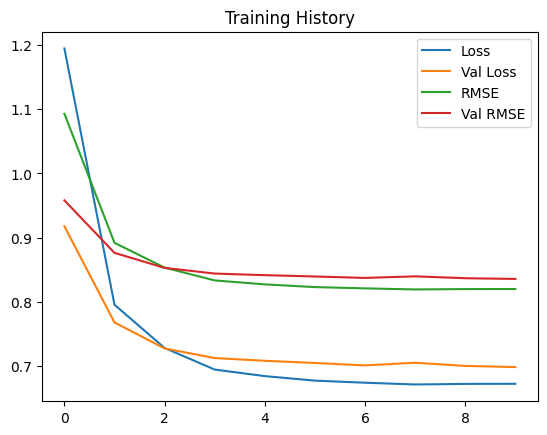

In [33]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.plot(history.history["root_mean_squared_error"], label="RMSE")
plt.plot(history.history["val_root_mean_squared_error"], label="Val RMSE")
plt.title("Training History")
plt.legend()
plt.show()

view_length = 100
plt.figure(figsize=(10, 5))
plt.plot(SS.inverse_transform(model.predict(X_test))[:view_length], label="Model Output")
plt.plot(y_test[:view_length], label="Actual")
plt.title("Viewing Predictions")
plt.legend()
plt.show()

# RBM Playground

(1293, 64) (144, 64) (360, 64) (1293,) (144,) (360,)
Accuracy 0.9111111111111111


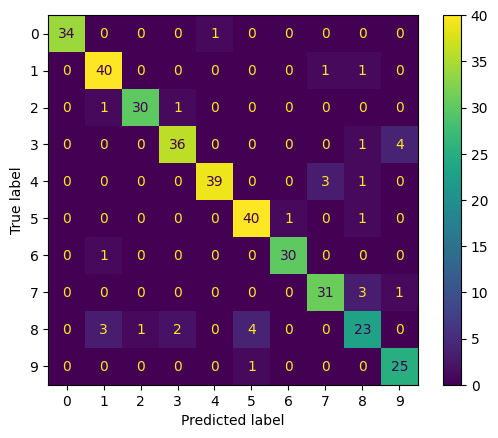

In [31]:
X, y = load_digits(return_X_y = True)

# X = np.asarray(X, "float32")
# X = minmax_scale(X, feature_range=(0, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1, random_state = 0)

print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)

# ("random forest", RandomForestClassifier()),
# ("ada boost", AdaBoostClassifier()),   
# ("gaussian process", GaussianProcessClassifier()),
# ("decision tree", DecisionTreeClassifier()),
# ("mlp", MLPClassifier()),
# ("svm", SVC())

# print("Before RBM: ", X_train[0])

pipe = Pipeline([
    # ("mms1", MinMaxScaler()),
    # ("rbm1", BernoulliRBM(n_components=128, learning_rate = 0.1, n_iter = 10, verbose = True)),
    # ("mms2", MinMaxScaler()),
    # ("rbm2", BernoulliRBM(n_components=192, learning_rate = 0.1, n_iter = 10, verbose = True)),
    # ("mms3", MinMaxScaler()),
    # ("rbm3", BernoulliRBM(n_components=256, learning_rate = 0.1, n_iter = 10, verbose = True)),
    ("mms4", MinMaxScaler()),
    ("rbm4", BernoulliRBM(n_components=128, learning_rate = 0.1, n_iter = 20, verbose = False, random_state = 0)),
    ("mms5", MinMaxScaler()),
    ("rbm5", BernoulliRBM(n_components=64, learning_rate = 0.1, n_iter = 10, verbose = False, random_state = 0)),
    ("final_classifier", RandomForestClassifier(random_state = 0))
])
# print("After RBM: ",X_train[0])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred))

r_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = r_cm)

disp.plot()
plt.show()

# .91, .90, .91 -128, 10
# .89, .88, .90 -256, 10
# .93, .91, .90 -64, 10
# .89, .89, .92 -32, 10
# .85, .85, .85 -64, 64, (10)
# .86, .86, .86 -64, 64, (10)
# .88, .91, .87 -64, 64, (10, 20)
# .91, .91,

# SciKit

In [97]:
concatenated_data = pd.read_csv("Concatenated Data.csv")
# raw_dataset = concatenated_data[["tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed", "sealevelpressure", "conditions"]]
raw_dataset = concatenated_data[["temp", "feelslike", "humidity", "windspeed", "sealevelpressure", "conditions"]]
raw_dataset["conditions"] = [word.replace(", ", "\n") if ("," in word) else word for word in raw_dataset["conditions"]]

LE = LabelEncoder()

# SS = StandardScaler()

ScalerObjects = []

# for column in raw_dataset.columns:
#     if column == "conditions":
#         continue 
    
#     Scaler = BernoulliRBM()
#     raw_dataset[column] = Scaler.fit_transform(raw_dataset[[column]])

raw_dataset["conditions"] =  LE.fit_transform(raw_dataset["conditions"])
# raw_dataset["tempmax"] = SS.fit_transform(raw_dataset["tempmax"])
# print(LE.classes_)

# exit
# y = raw_dataset.pop("conditions").to_numpy()
# X = raw_dataset.to_numpy()

t_arr = raw_dataset.copy().to_numpy()
window_length = 1

X = []
y = []

# print("Rearranging Data")
for i in range(len(t_arr)-window_length):
    t_row = []
    for j in t_arr[i:i+window_length]:
        t_row.append(j[:-1])
    t_row = np.array(t_row).flatten()
    X.append(t_row)
    y.append(t_arr[i + window_length][-1])

X = np.array(X, "float32")
X = minmax_scale(X, feature_range=(0, 1))
y = np.array(y)

counts = dict(collections.Counter(y))
max_count = max(counts.values())
# print(counts, max_count)

# Adding Elements (Eessential)
for key, value in counts.items():
    curX = []
    curY = []
    li, = np.where(y == key)
    for i in range((max_count - value) * 10):
        ci = random.choice(li)
        curX.append(X[ci])
        curY.append(y[ci])
    tX = X.tolist()
    tY = y.tolist()
    tX.extend(curX)
    tY.extend(curY)
    X = np.array(tX)
    y = np.array(tY)        

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


C:\Users\Alaric\AppData\Local\Temp\ipykernel_10332\3903237592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_dataset["conditions"] = [word.replace(", ", "\n") if ("," in word) else word for word in raw_dataset["conditions"]]
C:\Users\Alaric\AppData\Local\Temp\ipykernel_10332\3903237592.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_dataset["conditions"] =  LE.fit_transform(raw_dataset["conditions"])


In [98]:
X_train[2]

array([0.5       , 0.49342108, 0.62305987, 0.03586724, 0.51239395])

In [101]:
# pipe = Pipeline([
#     ('rbm1', BernoulliRBM(n_components = 5, learning_rate = 0.01, batch_size=100, n_iter=10, verbose = 1)),
#     ('rfc', RandomForestClassifier())
# ])
# print("Initial X_train:", X_train[0])
# rbm1 = BernoulliRBM(n_components=10, learning_rate=0.01, batch_size = 10, n_iter = 10, verbose = 1)
# X_train = rbm1.fit_transform(X_train, y_train)
# print("After Training X_train:", X_train[0])

classifiers = [
    ("random forest", RandomForestClassifier()),
    ("ada boost", AdaBoostClassifier()),
    
    # ("gaussian process", GaussianProcessClassifier()),
    ("decision tree", DecisionTreeClassifier()),
    ("mlp", MLPClassifier()),
    ("svm", SVC())
]

# Random Forest - 86%

print("X train shape:", X_train.shape)

for (name, _clf) in classifiers:

    predictor = Pipeline([
        ("mms", MinMaxScaler()),
        # ('rbm1', BernoulliRBM(n_components = 10, learning_rate = 0.01, n_iter = 10, verbose = 1)),
        # ('ss1', StandardScaler()),
        # ('rbm2', BernoulliRBM(n_components = 5, learning_rate = 0.01, batch_size = 10, n_iter = 10, verbose = 1)),
        # ('rbm3', BernoulliRBM(n_components = 5, learning_rate = 0.01, batch_size = 10, n_iter = 10, verbose = 1)),
        # ('rbm4', BernoulliRBM(n_components = 5, learning_rate = 0.01, batch_size = 10, n_iter = 10, verbose = 1)),
        # ('rbm5', BernoulliRBM(n_components = 5, learning_rate = 0.01, batch_size = 10, n_iter = 10, verbose = 1)),
        (name, _clf)
    ])
    predictor.fit(X_train, y_train)
    y_pred = predictor.predict(X_test)
    print(name, accuracy_score(y_test, y_pred))

    break 

# predictor = SVC(C=2.0) - 24%




# predictor.fit(X_train, y_train)
# y_pred = predictor.predict(X_test)

# pipe.fit(X_train, y_train)

# y_pred = pipe.predict(X_test)
# r_cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix = r_cm, display_labels = LE.classes_)

# disp.plot()
# plt.show()


X train shape: (29472, 5)
random forest 0.9773344191096635


In [65]:
def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [1, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 1], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 1, 0]],
    ]

    def shift(x, w):
        return convolve(x.reshape((8, 8)), mode="constant", weights=w).ravel()

    X = np.concatenate(
        [X] + [np.apply_along_axis(shift, 1, X, vector) for vector in direction_vectors]
    )
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y


X, y = load_digits(return_X_y=True)
X = np.asarray(X, "float32")
X, Y = nudge_dataset(X, y)
X = minmax_scale(X, feature_range=(0, 1))  # 0-1 scaling

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [66]:
# logistic = LogisticRegression(solver="newton-cg", tol=1)
rfc = RandomForestClassifier()

rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(
    steps=[
        ("rbm", rbm), 
        # ("logistic", logistic)
        ("rfc", rfc)
        ]
    )


In [68]:
from sklearn.base import clone

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 10

# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
# logistic.C = 6000

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train, Y_train)

# Training the Logistic regression classifier directly on the pixel
raw_pixel_classifier = clone(rfc)
# raw_pixel_classifier.C = 100.0
raw_pixel_classifier.fit(X_train, Y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.57, time = 0.31s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -23.68, time = 0.34s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -22.74, time = 0.33s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -21.92, time = 0.41s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -21.70, time = 0.35s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -21.03, time = 0.46s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -20.90, time = 0.57s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -20.47, time = 0.37s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -20.56, time = 0.39s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -20.18, time = 0.40s


RandomForestClassifier()

In [69]:
# The one with the RBM
Y_pred = rbm_features_classifier.predict(X_test)
print(
    f"Logistic regression using RBM features:\n{classification_report(Y_test, Y_pred)}\nAccuracy Score:\n{accuracy_score(Y_test, Y_pred)}"
)

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       174
           1       0.93      0.96      0.94       184
           2       0.98      0.97      0.98       166
           3       0.94      0.92      0.93       194
           4       0.95      0.95      0.95       186
           5       0.96      0.94      0.95       181
           6       0.99      0.99      0.99       207
           7       0.91      0.99      0.95       154
           8       0.94      0.89      0.92       182
           9       0.93      0.92      0.93       169

    accuracy                           0.95      1797
   macro avg       0.95      0.95      0.95      1797
weighted avg       0.95      0.95      0.95      1797

Accuracy Score:
0.9510294936004452


In [70]:
Y_pred = raw_pixel_classifier.predict(X_test)
print(
    f"Logistic regression using raw pixel features:\n{classification_report(Y_test, Y_pred)}\nAccuracy Score:\n{accuracy_score(Y_test, Y_pred)}"
)

Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       174
           1       0.96      0.99      0.98       184
           2       0.99      1.00      0.99       166
           3       0.98      0.93      0.96       194
           4       0.98      0.96      0.97       186
           5       0.97      0.95      0.96       181
           6       0.99      0.98      0.98       207
           7       0.93      0.99      0.96       154
           8       0.95      0.95      0.95       182
           9       0.96      0.95      0.96       169

    accuracy                           0.97      1797
   macro avg       0.97      0.97      0.97      1797
weighted avg       0.97      0.97      0.97      1797

Accuracy Score:
0.9688369504730105


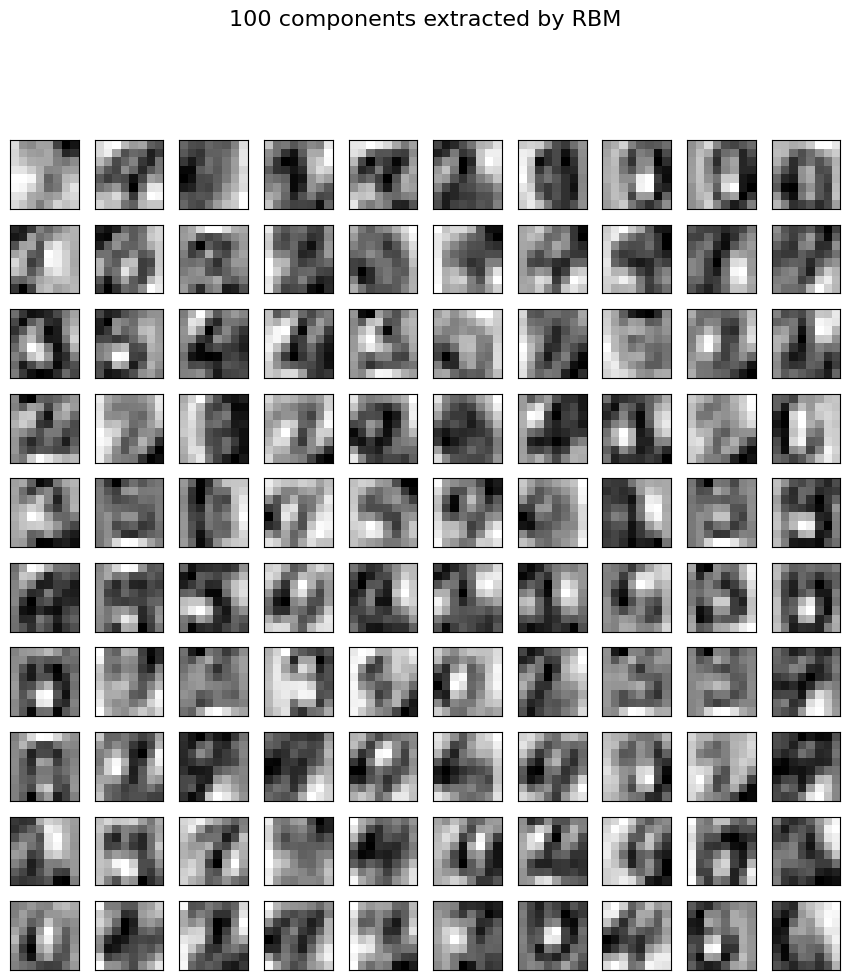

In [52]:
plt.figure(figsize=(5, 10))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
plt.suptitle("100 components extracted by RBM", fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()